<a href="https://colab.research.google.com/github/RaulOAlves/Wind_Turbine_Scada/blob/main/Wind_Turbine_Scada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wind Turbine Scada

Em turbinas eólicas, os sistemas Scada medem e salvam dados como velocidade do vento, direção do vento, energia gerada, etc. por intervalos de 10 minutos. Este arquivo foi retirado do sistema de scada de uma turbina eólica que está funcionando e gerando energia na Turquia. 

Os dados no arquivo são:

* Date/Time (para 10 min de intervalo)
* LV ActivePower (kW): 
 * A energia gerada pela turbina para aquele momento .
 * *The power generated by the turbine for that moment.*
* Wind Speed (m/s): 
  * A velocidade do vento na altura do cubo da turbina (a velocidade do vento que a turbina usa para geração de eletricidade).
 * *The wind speed at the hub height of the turbine (the wind speed that turbine use for electricity generation).* 
* Theoretical_Power_Curve (KWh):
 * Os valores teóricos de potência que a turbina gera com a velocidade do vento que é dada pelo fabricante da turbina.
 * *The theoretical power values that the turbine generates with that wind speed which is given by the turbine manufacturer.*
* Wind Direction (°): 
 * A direção do vento na altura do cubo da turbina (as turbinas eólicas giram para essa direção automaticamente).
 * *The wind direction at the hub height of the turbine (wind turbines turn to this direction automaticly).*

In [ ]:
!pip install windrose -q
!pip install chart_studio -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 KB 7.7 MB/s eta 0:00:00


## Importando as bibliotecas e Lendo os arquivos

In [ ]:
# Algebra linear e Processamento dos dados
import numpy as np
import pandas as pd

# Gráficos
import seaborn as sns 
import matplotlib.pyplot as plt
from windrose import WindroseAxes

%matplotlib inline

In [ ]:
# Lendo os arquivos
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/estudos_gerais/Wind_Turbine_Scada/T1.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


## Tratamento dos dados e Análise Exploratória

In [ ]:
# Renomeando as Colunas
df.rename(columns={"Date/Time": "Time",
                   "LV ActivePower (kW)":"ActivePower(kw)",
                   "Wind Speed (m/s)":"WindSpeed(m/s)",
                   "Theoretical_Power_Curve (KWh)":"TheoreticalPower(kwh)",
                   "Wind Direction (°)":"WindDirection(°)"}, 
          inplace=True)
df.head()

,Time,ActivePower(kw),WindSpeed(m/s),TheoreticalPower(kwh),WindDirection(°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [ ]:
# Função para extrair o mês
def find_month(x):
    if " 01 " in x:
        return "Jan"
    elif " 02 " in x:
        return "Feb"
    elif " 03 " in x:
        return "March"    
    elif " 04 " in x:
        return "April"    
    elif " 05 " in x:
        return "May"    
    elif " 06 " in x:
        return "June"    
    elif " 07 " in x:
        return "July"    
    elif " 08 " in x:
        return "August"    
    elif " 09 " in x:
        return "Sep"    
    elif " 10 " in x:
        return "Oct"    
    elif " 11 " in x:
        return "Nov"    
    else:
        return "Dec"

In [ ]:
# Criando a columa "Month" e aplicando a função "find_month" criada anteriormente
df['Month'] = df.Time.apply(find_month)
df

,Time,ActivePower(kw),WindSpeed(m/s),TheoreticalPower(kwh),WindDirection(°),Month
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan
...,...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724,Dec
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599,Dec
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500,Dec
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913,Dec


In [ ]:
# Função para arredondar os valores da velocidade do vento em intervalos de 0.5 m/s
'''Por exemplo, se a velocidade do vento for 3.3 m/s, a função irá comparar esse valor com a lista de intervalos e 
descobrir que o intervalo ao qual ela pertence é 3.25-3.75. 
Então, a função subtrai 0.25 do valor superior do intervalo (3.75) para obter 3.5 e retorna esse valor.'''
# O valor máximo de 25.5 é referente a velocidade máxima de vento analisada anteriormente, que é 25.21
def mean_speed(x):
  list=[]
  i=0.25
  while i<=25.5:
      list.append(i)
      i+=0.5
  
  for i in list:
    if x < i:
      x=i-0.25
      return x

In [ ]:
# Criando a coluna "mean_WindSpeed" e apliacndo a função mean_speed criada anteriormente
df['mean_WindSpeed']=df['WindSpeed(m/s)'].apply(mean_speed)
df

,Time,ActivePower(kw),WindSpeed(m/s),TheoreticalPower(kwh),WindDirection(°),Month,mean_WindSpeed
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan,5.5
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan,5.5
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan,5.0
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan,5.5
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan,5.5
...,...,...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724,Dec,11.5
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599,Dec,7.5
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500,Dec,8.5
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913,Dec,9.5


In [ ]:
# Função para arredondar os valores da direção do vento em intervalos de 30 graus
'''Por exemplo, se a direção do vento for 259°, a função irá comparar esse valor com a lista de intervalos e 
descobrir que o intervalo ao qual ela pertence é 255-285. 
Então, a função subtrai 15 do valor superior do intervalo (285) para obter 270 e retorna esse valor.'''
# O valor máximo de 375 é referente a direção máxima de vento analisada anteriormente, que é 360°
def mean_direction(x):
  list=[]
  i=15
  while i<=375:
    list.append(i)
    i+=30

  for i in list:
    if x < i:
      x=i-15
      if x==360:
        return 0
      else:
        return x

In [ ]:
# Criando a coluna "mean_direction" e apliacndo a função mean_direction criada anteriormente
df['mean_direction'] = df['WindDirection(°)'].apply(mean_direction)
df.head()

,Time,ActivePower(kw),WindSpeed(m/s),TheoreticalPower(kwh),WindDirection(°),Month,mean_WindSpeed,mean_direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan,5.5,270
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan,5.5,270
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan,5.0,270
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan,5.5,270
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan,5.5,270


In [ ]:
# Função para transformar a direção do vento numérica em pontos cardeais
def find_direction(x):
  if x==0:
      return "N"
  if x==30:
      return "NNE"
  if x==60:
      return "NEE" 
  if x==90:
      return "E" 
  if x==120:
      return "SEE" 
  if x==150:
      return "SSE" 
  if x==180:
      return "S" 
  if x==210:
      return "SSW" 
  if x==240:
      return "SWW" 
  if x==270:
      return "W" 
  if x==300:
      return "NWW" 
  if x==330:
      return "NNW"

In [ ]:
# Criando a coluna "Direction" e apliacndo a função find_direction criada anteriormente
df['Direction'] = df['mean_direction'].apply(find_direction)
df.head()

,Time,ActivePower(kw),WindSpeed(m/s),TheoreticalPower(kwh),WindDirection(°),Month,mean_WindSpeed,mean_direction,Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan,5.5,270,W
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan,5.5,270,W
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan,5.0,270,W
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan,5.5,270,W
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan,5.5,270,W


In [ ]:
# Verificiando quais pontos estão fora e dentro do limite teórico

pot_real = df['ActivePower(kw)'].tolist()
pot_teorica = df['TheoreticalPower(kwh)'].tolist()
pot_max = []
pot_min = []
limite_dentro = []

for potencia in pot_teorica:
  pot_max.append(potencia*1.05)
  pot_min.append(potencia*0.95)

for p, potencia in enumerate(pot_real):
  if potencia<=pot_max[p] and potencia>=pot_min[p]:
    limite_dentro.append('Dentro')
  elif potencia == 0:
    limite_dentro.append('Zero')
  else:
    limite_dentro.append('Fora')

print(limite_dentro.count('Dentro')/len(limite_dentro))

0.37286760340391845


In [ ]:
df['DentroLimite'] = limite_dentro
df.head()

,Time,ActivePower(kw),WindSpeed(m/s),TheoreticalPower(kwh),WindDirection(°),Month,mean_WindSpeed,mean_direction,Direction,DentroLimite
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan,5.5,270,W,Fora
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan,5.5,270,W,Fora
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan,5.0,270,W,Fora
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan,5.5,270,W,Fora
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan,5.5,270,W,Fora


In [ ]:
# Filtrando os valores de velocidade do vento entre 3.5 e 25, pois esses são os intervalos onde o funcionamento da turbina é ideal.
df_2 = df[(df['WindSpeed(m/s)']>3.5) & (df['WindSpeed(m/s)']<25.5)]
df_2.head()

,Time,ActivePower(kw),WindSpeed(m/s),TheoreticalPower(kwh),WindDirection(°),Month,mean_WindSpeed,mean_direction,Direction,DentroLimite
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan,5.5,270,W,Fora
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan,5.5,270,W,Fora
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan,5.0,270,W,Fora
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan,5.5,270,W,Fora
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan,5.5,270,W,Fora


In [ ]:
# Filtrando os valores onde o a velocidade do vento é maior que 3.5 e o Active power é zero, pois as turbinas não estão funcionando nessas condições.
df_3 = df_2[(df_2['WindSpeed(m/s)']>3.5) & (df_2['ActivePower(kw)']!=0)]
print(df_3.isnull().sum())
df_3.head()

Time                     0
ActivePower(kw)          0
WindSpeed(m/s)           0
TheoreticalPower(kwh)    0
WindDirection(°)         0
Month                    0
mean_WindSpeed           0
mean_direction           0
Direction                0
DentroLimite             0
dtype: int64


,Time,ActivePower(kw),WindSpeed(m/s),TheoreticalPower(kwh),WindDirection(°),Month,mean_WindSpeed,mean_direction,Direction,DentroLimite
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan,5.5,270,W,Fora
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan,5.5,270,W,Fora
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan,5.0,270,W,Fora
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan,5.5,270,W,Fora
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan,5.5,270,W,Fora


In [60]:
# Criando a coluna "Losses" e calculando a quantidade de potência perdida
df_3['Loss_Values(kw)'] = df_3['TheoreticalPower(kwh)']-df_3['ActivePower(kw)']
df_3['Loss(%)'] = df_3['Loss_Values(kw)']/df_3['TheoreticalPower(kwh)']*100

# Arredondando as casa decimais
df_3 = df_3.round({'ActivePower(kw)': 2, 
               'WindSpeed(m/s)': 2, 
               'TheoreticalPower(kwh)': 2, 
               'WindDirection(°)': 2, 
               'Loss_Values(kw)': 2, 
               'Loss(%)': 2})
df_3.head()

,Time,ActivePower(kw),WindSpeed(m/s),TheoreticalPower(kwh),WindDirection(°),Month,mean_WindSpeed,mean_direction,Direction,DentroLimite,Loss_Values(kw),Loss(%)
0,01 01 2018 00:00,380.05,5.31,416.33,259.99,Jan,5.5,270,W,Fora,36.28,8.71
1,01 01 2018 00:10,453.77,5.67,519.92,268.64,Jan,5.5,270,W,Fora,66.15,12.72
2,01 01 2018 00:20,306.38,5.22,390.90,272.56,Jan,5.0,270,W,Fora,84.52,21.62
3,01 01 2018 00:30,419.65,5.66,516.13,271.26,Jan,5.5,270,W,Fora,96.48,18.69
4,01 01 2018 00:40,380.65,5.58,491.70,265.67,Jan,5.5,270,W,Fora,111.05,22.58


<Axes: xlabel='WindSpeed(m/s)', ylabel='ActivePower(kw)'>

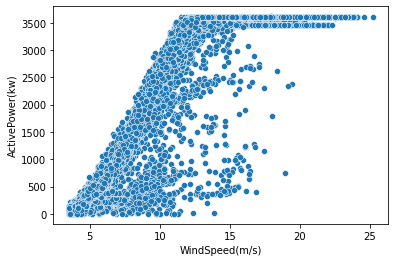

In [59]:
# Plotando os dados de potência gerada pela velocidade do vento
sns.scatterplot(data=df_3, x='WindSpeed(m/s)', y='ActivePower(kw)')

<Axes: xlabel='WindSpeed(m/s)', ylabel='TheoreticalPower(kwh)'>

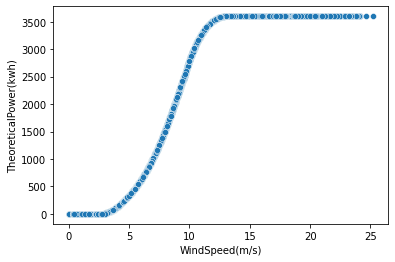

In [56]:
# Plotando os dados de potência teórica gerada pela velocidade do vento
sns.scatterplot(data=df, x='WindSpeed(m/s)', y='TheoreticalPower(kwh)')

<Axes: xlabel='WindSpeed(m/s)', ylabel='ActivePower(kw)'>

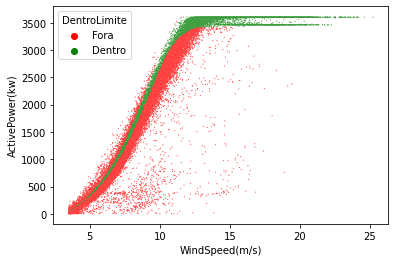

In [57]:
# Unificando os dados de dentro e fora da linha teórica
cores = {'Dentro':'green', 'Fora': 'red', 'Zero':'blue'}
sns.scatterplot(data=df_3, x='WindSpeed(m/s)', y='ActivePower(kw)', hue='DentroLimite', s=1, palette=cores)

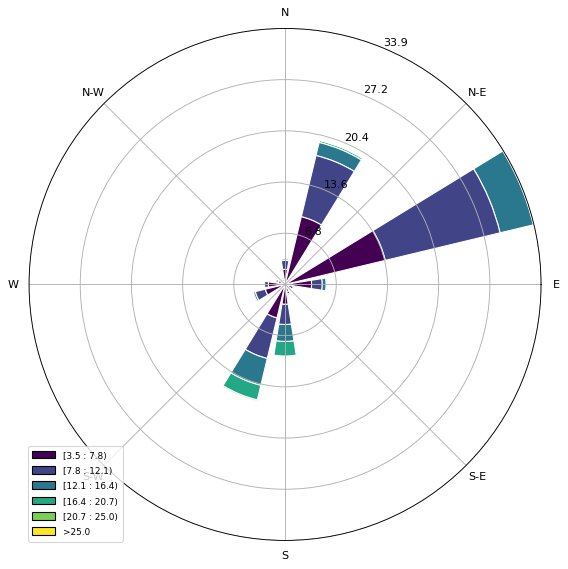

In [73]:
# Verificando a direção do vento predominante
ax = WindroseAxes.from_ax()
ax.bar(df_3['mean_direction'], df_3['mean_WindSpeed'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.show()

In [94]:
# Criando um data frame com indice de velocidade para os dados limpos
df_speed_group = df_3.groupby('mean_WindSpeed')
df_speed = df_speed_group.mean()

# Removendo colunas desnecessárias
df_speed.drop(columns={"WindSpeed(m/s)","WindDirection(°)","mean_direction"},inplace=True)

# Criando a coluna windspeed para os valores de índex
list_speed = df_speed.index.copy()
df_speed['WindSpeed(m/s)'] = list_speed

# Reordenar as colunas
df_speed = df_speed[['WindSpeed(m/s)','ActivePower(kw)', 'TheoreticalPower(kwh)', 'Loss_Values(kw)', 'Loss(%)']]

# Alterando o número do índice
df_speed['Index'] = list(range(1,len(df_speed.index)+1))
df_speed.set_index('Index', inplace=True)

# Arredondar os valores para 2 casas decimais
df_speed = df_speed.round({"WindSpeed(m/s)": 1, 
                           'ActivePower(kw)': 2, 
                           'TheoreticalPower(kwh)': 2, 
                           'Loss_Values(kw)': 2, 
                           'Loss(%)': 2})

# Criar uma coluna para mostrar quantos registros tem naquele grupo
df_speed['Count'] = [len(df_3['mean_WindSpeed'][df_3['mean_WindSpeed']==i]) for i in df_speed['WindSpeed(m/s)']]

df_speed.head(10)

,WindSpeed(m/s),ActivePower(kw),TheoreticalPower(kwh),Loss_Values(kw),Loss(%),Count
Index,,,,,,
1,3.5,51.68,68.61,16.94,24.14,675
2,4.0,98.33,127.75,29.42,23.26,1736
3,4.5,183.96,222.48,38.52,17.44,1794
4,5.0,285.47,336.32,50.86,15.24,1725
5,5.5,402.30,472.10,69.80,14.84,2012
6,6.0,546.76,627.10,80.34,12.84,2216
7,6.5,713.07,807.67,94.60,11.76,2274
8,7.0,902.86,1015.80,112.94,11.16,2320
9,7.5,1122.43,1256.94,134.51,10.72,2254
